In [2]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

DATA_DIR = "/content/drive/MyDrive/datasets/PlantVillage"


In [3]:
classes = sorted(os.listdir(DATA_DIR))
print("Number of classes:", len(classes))
print(classes)


Number of classes: 15
['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


In [4]:
selected_classes = [
    'Tomato_healthy',
    'Tomato_Late_blight',
    'Tomato_Leaf_Mold',
    'Tomato_Septoria_leaf_spot'
]

filtered_classes = [c for c in os.listdir(DATA_DIR) if c in selected_classes]

print("Using classes:", filtered_classes)


Using classes: ['Tomato_healthy', 'Tomato_Leaf_Mold', 'Tomato_Late_blight', 'Tomato_Septoria_leaf_spot']


In [5]:
for cls in filtered_classes:
    class_path = os.path.join(DATA_DIR, cls)
    print(cls, "->", len(os.listdir(class_path)))


Tomato_healthy -> 1591
Tomato_Leaf_Mold -> 952
Tomato_Late_blight -> 1910
Tomato_Septoria_leaf_spot -> 1778


In [6]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import os

In [7]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42


In [8]:
DATA_DIR = "/content/drive/MyDrive/datasets/PlantVillage"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    class_names=selected_classes,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    class_names=selected_classes,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)


Found 6231 files belonging to 4 classes.
Using 4985 files for training.
Found 6231 files belonging to 4 classes.
Using 1246 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)


['Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot']


In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [11]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
import matplotlib.pyplot as plt

for images, labels in train_ds.take(1):
    plt.figure(figsize=(8, 8))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [12]:
num_classes = len(class_names)

model = Sequential([
    layers.Input(shape=(224, 224, 3)),

    layers.Rescaling(1./255),

    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),

    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation="softmax")
])


In [13]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
EPOCHS = 10

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)


Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 491s 666ms/step - accuracy: 0.4766 - loss: 1.3279 - val_accuracy: 0.8660 - val_loss: 0.3696
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.8664 - loss: 0.3637 - val_accuracy: 0.8868 - val_loss: 0.3128
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.8882 - loss: 0.3048 - val_accuracy: 0.9478 - val_loss: 0.1466
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.9270 - loss: 0.2005 - val_accuracy: 0.9470 - val_loss: 0.1539
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.9456 - loss: 0.1754 - val_accuracy: 0.9583 - val_loss: 0.1187
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.9520 - loss: 0.1313 - val_accuracy: 0.9591 - val_loss: 0.1265
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.9675 - loss: 0.0919 - val_accuracy: 0.9615 - val_loss: 0.1225
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.9777 - loss: 0.0738 - val_a

In [17]:
import os
os.makedirs("../models", exist_ok=True)


In [16]:
import os

total_images = 0
for cls in os.listdir(DATA_DIR):
    cls_path = os.path.join(DATA_DIR, cls)
    if os.path.isdir(cls_path):
        count = len(os.listdir(cls_path))
        print(cls, count)
        total_images += count

print("TOTAL IMAGES:", total_images)


Pepper__bell___Bacterial_spot 997
Potato___healthy 152
Pepper__bell___healthy 1478
Tomato_Bacterial_spot 2127
Potato___Early_blight 1000
Tomato_healthy 1591
Tomato_Leaf_Mold 952
Tomato_Late_blight 1910
Tomato_Early_blight 1000
Potato___Late_blight 1000
Tomato_Septoria_leaf_spot 1778
Tomato__Target_Spot 1404
Tomato_Spider_mites_Two_spotted_spider_mite 1676
Tomato__Tomato_YellowLeaf__Curl_Virus 3209
Tomato__Tomato_mosaic_virus 373
TOTAL IMAGES: 20647


In [19]:
model.save("/content/drive/MyDrive/datasets/cnn_crop_disease_model.h5")


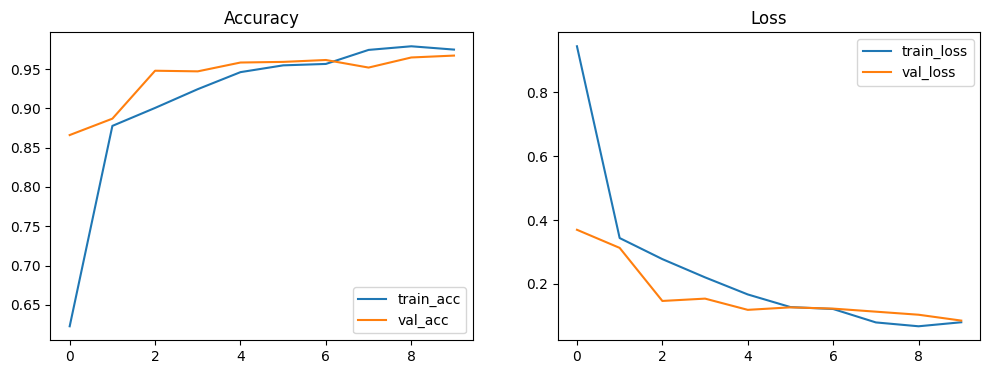

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title("Loss")

plt.show()
